In [1]:
import pandas as pd
import numpy as np

In [3]:
GCS = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GC_services2019.csv")    # General services Summary 2019 #
GCS.drop(['Unnamed: 0'], axis=1,inplace=True)
GCS = GCS.drop(columns=['page_number'])
list1 = GCS["word"].values

In [4]:
import nltk
from nltk.probability import FreqDist
fdist = FreqDist(list1)
print(fdist)

<FreqDist with 704 samples and 5313 outcomes>


In [5]:
fdist.most_common(10)

[('Continue', 96),
 ('Medical', 88),
 ('Resources', 78),
 ('Management', 74),
 ('Public', 72),
 ('County', 71),
 ('Planning', 69),
 ('Grant', 68),
 ('Improve', 68),
 ('Youth', 66)]

In [6]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)

<Figure size 640x480 with 1 Axes>

In [7]:
GCS.sentiment = GCS.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [8]:
GCS.sentiment.value_counts()

1    1767
2    1152
0     704
3     607
6     342
5     311
7     197
8     124
4     109
Name: sentiment, dtype: int64

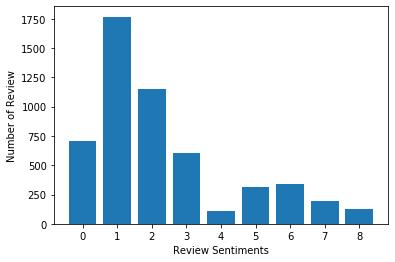

In [9]:
Sentiment_count=GCS.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [10]:
##########################################################################################################################

In [13]:
GCS08 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GC_services2008.csv")    # General services Summary 2008 #
GCS08.drop(['Unnamed: 0'], axis=1,inplace=True)
GCS08 = GCS08.drop(columns=['page_number'])
list2 = GCS08["word"].values

In [14]:
import nltk
from nltk.probability import FreqDist
fdist = FreqDist(list2)
print(fdist)

<FreqDist with 497 samples and 2732 outcomes>


In [15]:
fdist.most_common(10)

[('Emergency', 40),
 ('Medical', 40),
 ('Director', 40),
 ('Public', 38),
 ('Planning', 36),
 ('Continue', 36),
 ('Management', 34),
 ('Provide', 34),
 ('County', 33),
 ('Resources', 33)]

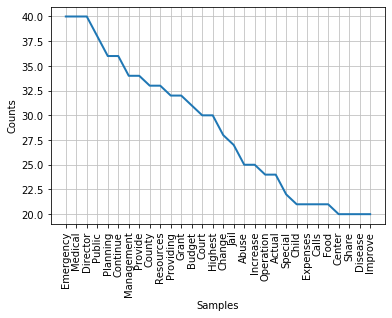

In [16]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)

In [17]:
GCS08.sentiment = GCS08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [18]:
GCS08.sentiment.value_counts()

1    859
2    573
0    382
3    335
5    200
6    174
7     85
8     65
4     59
Name: sentiment, dtype: int64

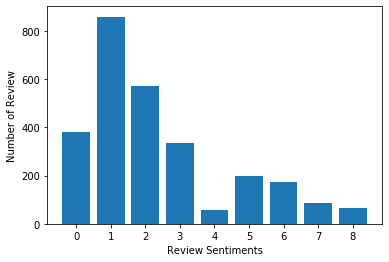

In [19]:
Sentiment_count=GCS08.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [21]:
GCS08['Year'] = 2008
GCS['Year'] = 2019

In [22]:
CombinedGCS = pd.concat([GCS08,GCS]) 
CombinedGCS.head()

,word,sent_count,sentiment,category,Year
0,Ongoing,16,3,Emotion,2008
1,Fire,15,5,Emotion,2008
2,Child,14,3,Emotion,2008
3,Child,14,6,Emotion,2008
4,Child,14,1,Sentiment,2008


8045
sentiment          0          1          2          3         4         5  \
Year                                                                        
2008       13.982430  31.442167  20.973646  12.262079  2.159590  7.320644   
2019       13.250518  33.258046  21.682665  11.424807  2.051572  5.853567   

sentiment         6         7         8  
Year                                     
2008       6.368960  3.111274  2.379209  
2019       6.437041  3.707886  2.333898  


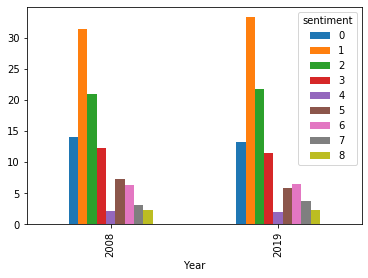

In [23]:
len_DF = len(CombinedGCS)
print(len_DF)
budget_sentiment = CombinedGCS.groupby(['Year', 'sentiment']).sentiment.count()
#budget_sentiment.plot(kind='bar')
#print(budget_sentiment)
abc = budget_sentiment.groupby(level=0).apply(lambda x:x*100/x.sum()).unstack()
print(abc)
abc.plot(kind='bar')